In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

In [14]:
Datos = pd.read_csv('./Car_details_v3.csv')

In [15]:
Datos.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [16]:
Datos.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Text(0.5, 1.0, 'Valores Atípicos')

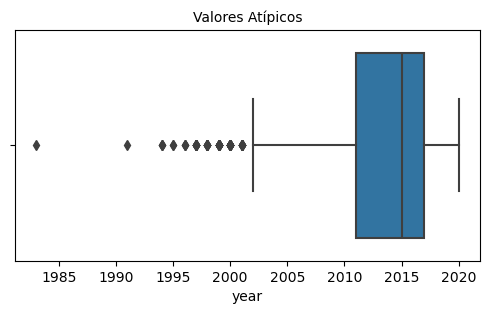

In [17]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['year'])
plt.title('Valores Atípicos', fontsize=10)

Text(0.5, 1.0, 'Valores Atípicos')

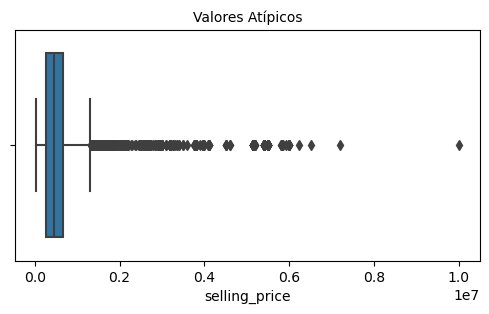

In [18]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['selling_price'])
plt.title('Valores Atípicos', fontsize=10)

Text(0.5, 1.0, 'Valores Atípicos')

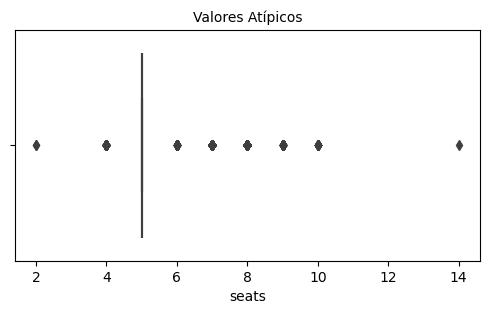

In [19]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['seats'])
plt.title('Valores Atípicos', fontsize=10)

In [20]:
Datos.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [21]:
print ("Cantidad de registros en 0 en la columna year: ",Datos['year'].isin([0]).sum())
print ("Cantidad de registros en 0 en la columna mileage: ",Datos['mileage'].isin([0]).sum())

Cantidad de registros en 0 en la columna year:  0
Cantidad de registros en 0 en la columna mileage:  0


In [22]:
year_minimo = 1995
year_maximo = 2024
Total_atipicos = ((Datos['year']<year_minimo)|(Datos['year']>year_maximo)).sum()
print ("year atipicos registra: ",Total_atipicos)

year atipicos registra:  5


In [23]:
price_minimo = Datos['selling_price'].min()
print( "selling_price minimo: ", price_minimo)

selling_price minimo:  29999


In [24]:
price_maximo = Datos['selling_price'].max()
print("selling_price maximo: ", price_maximo)

selling_price maximo:  10000000


In [25]:
estadis_precio = Datos['selling_price'].describe()
print("Estadistica descriptiva de selling_price: ", estadis_precio)

Estadistica descriptiva de selling_price:  count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


In [26]:
correlacion = Datos['year'].corr(Datos['selling_price'])
print("Correlación entre 'year' y 'selling_price':", correlacion)

Correlación entre 'year' y 'selling_price': 0.4140918605571504


In [27]:
Datos = Datos[(Datos['year']<year_maximo)&(Datos['year']>year_minimo)]

In [28]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8121 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8121 non-null   object 
 1   year           8121 non-null   int64  
 2   selling_price  8121 non-null   int64  
 3   km_driven      8121 non-null   int64  
 4   fuel           8121 non-null   object 
 5   seller_type    8121 non-null   object 
 6   transmission   8121 non-null   object 
 7   owner          8121 non-null   object 
 8   mileage        7904 non-null   object 
 9   engine         7904 non-null   object 
 10  max_power      7910 non-null   object 
 11  torque         7903 non-null   object 
 12  seats          7904 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 888.2+ KB


In [29]:
Datos = Datos.dropna()

Text(0.5, 1.0, 'Valores Atípicos')

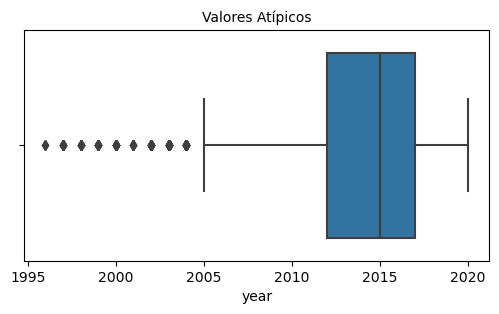

In [30]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['year'])
plt.title('Valores Atípicos', fontsize=10)

Text(0.5, 1.0, 'Valores Atípicos')

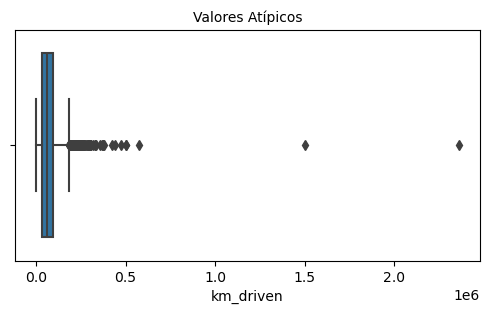

In [31]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['km_driven'])
plt.title('Valores Atípicos', fontsize=10)

In [32]:
km_drivenMin = Datos['km_driven'].min()
print( "km_driven minimo: ", km_drivenMin)

km_driven minimo:  1


In [33]:
km_drivenMax = Datos['km_driven'].max()
print("km_driven maximo: ", km_drivenMax)

km_driven maximo:  2360457


In [34]:
km_drivenMin = 1
km_drivenMax = 500000
Total_Drivenati = ((Datos['km_driven']<km_drivenMin)|(Datos['km_driven']>km_drivenMax)).sum()
print ("km_driven atipicos registra: ",Total_Drivenati)

km_driven atipicos registra:  3


In [35]:
Datos = Datos[(Datos['km_driven']<km_drivenMax)&(Datos['year']>km_drivenMin)]

In [36]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7898 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7898 non-null   object 
 1   year           7898 non-null   int64  
 2   selling_price  7898 non-null   int64  
 3   km_driven      7898 non-null   int64  
 4   fuel           7898 non-null   object 
 5   seller_type    7898 non-null   object 
 6   transmission   7898 non-null   object 
 7   owner          7898 non-null   object 
 8   mileage        7898 non-null   object 
 9   engine         7898 non-null   object 
 10  max_power      7898 non-null   object 
 11  torque         7898 non-null   object 
 12  seats          7898 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 863.8+ KB


In [37]:
Datos['selling_price'].value_counts()

selling_price
300000     221
600000     211
550000     203
350000     203
450000     194
          ... 
3900000      1
2850000      1
39000        1
112999       1
746000       1
Name: count, Length: 669, dtype: int64

In [38]:
Datos['year'].value_counts()

year
2017    1010
2016     856
2018     806
2015     775
2013     668
2014     620
2012     620
2019     583
2011     568
2010     374
2009     231
2008     201
2007     172
2006     102
2005      76
2020      74
2004      51
2003      37
2002      19
2000      15
1999      14
1998       9
1997       9
2001       6
1996       2
Name: count, dtype: int64

In [39]:
Datos['seats'].value_counts()

seats
5.0     6250
7.0     1118
8.0      235
4.0      131
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: count, dtype: int64

In [40]:
entrena = Datos.drop('selling_price', axis=1)
# se crea el archivo entrena sin la columna selling_price

In [41]:
prueba = Datos['selling_price']
# se crea el archivo prueba que solo contiene la columna selling_price

In [47]:
entrena_train, entrena_test, prueba_train, prueba_test = train_test_split(entrena, prueba, test_size=0.25, random_state=0)

In [48]:
entrena.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7898 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7898 non-null   object 
 1   year          7898 non-null   int64  
 2   km_driven     7898 non-null   int64  
 3   fuel          7898 non-null   object 
 4   seller_type   7898 non-null   object 
 5   transmission  7898 non-null   object 
 6   owner         7898 non-null   object 
 7   mileage       7898 non-null   object 
 8   engine        7898 non-null   object 
 9   max_power     7898 non-null   object 
 10  torque        7898 non-null   object 
 11  seats         7898 non-null   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 802.1+ KB


In [49]:
prueba.info()

<class 'pandas.core.series.Series'>
Index: 7898 entries, 0 to 8127
Series name: selling_price
Non-Null Count  Dtype
--------------  -----
7898 non-null   int64
dtypes: int64(1)
memory usage: 123.4 KB


In [50]:
print (prueba_train)

3410    3200000
1683     678000
6883     466000
6574    5150000
4567     370000
         ...   
5081     800000
3369     450000
1704     475000
2696     170000
2823    1650000
Name: selling_price, Length: 5923, dtype: int64


In [52]:
M_regresion = LinearRegression()
# se define el modelo de regresion y se llama liblinear que una libreria